In [2]:
import cv2
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import SimpleITK as sitk

def show_frame(image, blurriness, frame_number):
    dpi = 100  # Use your preferred DPI for display
    height, width = image.shape

    # Create a figure matching the original image size (1:1)
    fig = plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)

    # Adjust subplot to remove borders
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Show the image without any interpolation (1:1 scale)
    plt.imshow(image, cmap='gray', interpolation='none')

    # Overlay the title on top of the image
    plt.text(width / 2, 10, f"var={blurriness}, i={frame_number}", color='white', fontsize=12, ha='center', va='top', backgroundcolor='black')
    # Hide axis
    plt.axis('off')
    plt.show()

In [3]:
## Import video file
# Path to the .mpg file
video_path = "G:\PapyrusSorted\AIZUATOVA_Imira_19970420_FEMALE\OD_20231124121205\OD_20231124121205_X0.0T_Y-2.0_Z0.0_AIZUATOVA_Imira_246.mpg"

# Open the video file
video = cv2.VideoCapture(video_path)

if not video.isOpened():
    print("Error opening video file")
    exit()

frames_list = []

# Read the first 4 frames
initial_frames = []
for _ in range(4):
    ok, frame = video.read()
    if not ok:
        print("Cannot read video file")
        exit()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    initial_frames.append(gray_frame)

# Average the 4 initial frames
initial_avg = np.mean(initial_frames, axis=0)
frames_list.append(initial_avg)

# Read and average every triplet of frames
while True:
    triplet_frames = []
    for _ in range(3):
        ok, frame = video.read()
        if not ok:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        triplet_frames.append(gray_frame)

    if len(triplet_frames) < 3:
        break

    triplet_avg = np.mean(triplet_frames, axis=0)
    frames_list.append(triplet_avg)

video.release()

frames = np.array(frames_list)  # Output array of frames
print(frames.shape)

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\tengl\AppData\Local\Temp\ipykernel_18248\3902638539.py:3: SyntaxWarning: invalid escape sequence '\P'
  video_path = "G:\PapyrusSorted\AIZUATOVA_Imira_19970420_FEMALE\OD_20231124121205\OD_20231124121205_X0.0T_Y-2.0_Z0.0_AIZUATOVA_Imira_246.mpg"


(39, 1066, 1066)


In [4]:
## Determine the local gray level variance in a window https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=903548
window_size = 36  # Define the window size
var_of_gray = []
for frame in frames:
    height, width = frame.shape
    local_variances = []
    for y in range(0, height, window_size):
        for x in range(0, width, window_size):
            window = frame[y:y+window_size, x:x+window_size]
            if window.size == 0:
                continue
            local_variances.append(np.var(window))
    var_of_gray.append(np.mean(local_variances))


In [ ]:
## Show frames and graph variance over frame indices
for i in range(len(frames)):
    show_frame(frames[i], var_of_gray[i], i)

plt.figure(figsize=(10, 6))
plt.plot(var_of_gray, marker='o', linestyle='-', color='b')
plt.title('Local Gray Level Variance Over Frames')
plt.xlabel('Frame Index')
plt.ylabel('Local Gray Level Variance')
plt.grid(True)
plt.show()

In [9]:
## Select the frames with the highest variance
threshold = 1400
selected_frames = [i for i, var in enumerate(var_of_gray) if var > threshold]
best_frame = np.argmax(var_of_gray)
print(selected_frames)
print(best_frame)

[9, 10, 15, 21, 22, 26]
10


In [11]:
# ## Register selected frames
# def register_images(fixed_image, moving_image):
#     # Convert the images to SimpleITK format
#     fixed_image = sitk.GetImageFromArray(fixed_image)
#     moving_image = sitk.GetImageFromArray(moving_image)
# 
#     # Initialize the registration method
#     registration_method = sitk.ImageRegistrationMethod()
# 
#     # Similarity metric settings
#     registration_method.SetMetricAsMeanSquares()
# 
#     # Interpolator settings
#     registration_method.SetInterpolator(sitk.sitkLinear)
# 
#     # Optimizer settings
#     registration_method.SetOptimizerAsRegularStepGradientDescent(learningRate=1.0,
#                                                                  minStep=1e-6,
#                                                                  numberOfIterations=200,
#                                                                  gradientMagnitudeTolerance=1e-6)
# 
#     # Set the initial transform
#     initial_transform = sitk.CenteredTransformInitializer(fixed_image,
#                                                           moving_image,
#                                                           sitk.Euler2DTransform(),
#                                                           sitk.CenteredTransformInitializerFilter.GEOMETRY)
#     registration_method.SetInitialTransform(initial_transform, inPlace=False)
# 
#     # Perform the registration
#     final_transform = registration_method.Execute(fixed_image, moving_image)
# 
#     # Resample the moving image
#     moving_resampled = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
# 
#     return moving_resampled, final_transform
# 
# 
# # Register the selected frames to the best frame
# registered_images = []
# fixed_image = frames[best_frame]
# for i in range(len(frames)):
#     if i == best_frame:
#         registered_images.append(frames[i])
#         continue
#     moving_image = frames[i]
#     registered_image, transform = register_images(fixed_image, moving_image)
#     registered_images.append(registered_image)
# 
# # Convert registered images back to NumPy arrays for further processing or visualization
# registered_images_np = [sitk.GetArrayFromImage(img) for img in registered_images]
# 
# for i in range(len(registered_images_np)):
#     show_frame(registered_images_np[i])

C:\Users\tengl\miniconda3\Lib\site-packages\SimpleITK\extra.py:466: SyntaxWarning: invalid escape sequence '\s'
  """Blurs an image by separable convolution with discrete


AttributeError: 'numpy.ndarray' object has no attribute 'GetPixelIDValue'

(1024, 1024)


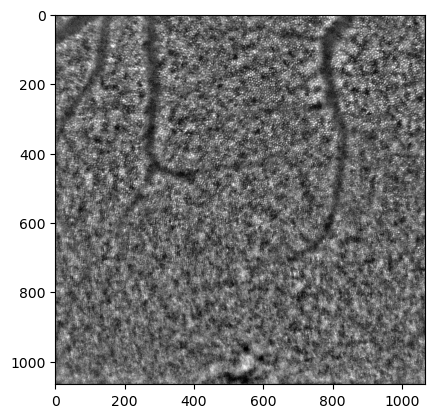

In [23]:
# Crop the frames to 1024x1024
cropped_frames = []
for frame in frames[selected_frames]:
    height, width = frame.shape
    y = (height - 1024) // 2
    x = (width - 1024) // 2
    cropped_frame = frame[y:y+1024, x:x+1024]
    cropped_frames.append(cropped_frame)

height, width = frames[best_frame].shape
y = (height - 1024) // 2
x = (width - 1024) // 2
cropped_best_frame = frames[best_frame][y:y+1024, x:x+1024]
print(cropped_frame.shape)

plt.imshow(frames[best_frame], cmap='gray')

In [24]:
# https://github.com/bionanopatterning/pyGPUreg
# import pyGPUreg as reg
# 
# reg.init()
# 
# reg.set_template(cropped_best_frame)
# registered_frames = []
# for frame in cropped_frames:
#     registered_frames.append(reg.register_to_template(frame))


(1024, 1024)


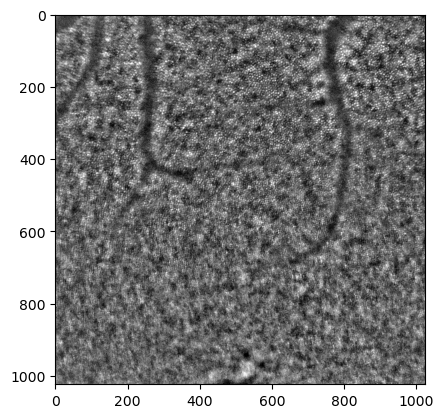

In [43]:
# print(registered_frames[0][0].shape)
# plt.imshow(cropped_best_frame, cmap='gray')